<a href="https://colab.research.google.com/github/DaniloThiago/anime-colab/blob/main/Pyvis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
!pip install pyvis
!pip install networkx

In [58]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyvis import network as net
from IPython.core.display import display, HTML

In [59]:
# Criando um objeto 'nt' do tipo Network do pyvis
got_net = net.Network(height="750px", width="100%", bgcolor="#222222", font_color="white",notebook=True, cdn_resources='in_line')
# Configura o algoritmo de layout Barnes-Hut para posicionar os nós do grafo de forma eficiente
got_net.barnes_hut()

got_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pyvis/Anime.csv")
filtered_data = got_data.query('Release_year >= 2022.0')

# Deixando somente as colunas Name e Voice_actors
filtered_data = filtered_data.loc[:, ['Name', 'Voice_actors']]
# Removendo as linhas com dados NaN
filtered_data = filtered_data.dropna(subset=['Voice_actors'])
# Pegando a primeira linha da coluna
filtered_data['Voice_actors'] = filtered_data['Voice_actors'].str.split('\n').str[0]
# Remove os dados que não tenha pelo menos um ator no padrão Personagem : Nome_Ator
filtered_data = filtered_data[filtered_data['Voice_actors'].str.contains(':')]

# Cria um dicionário para armazenar as obras e os atores associados a elas
obras_atores = {}

# Criar o grafo do NetworkX
graph = nx.Graph()

# Percorre o filtered_data para identificar as obras e os atores envolvidos
for index, row in filtered_data.iterrows():
  name = row['Name']
  actors = row['Voice_actors'].split(',')

  for actor in actors:
    a = actor.split(':')
    if len(a) > 1:
      actor_name = a[1].strip()
      if actor_name not in got_net.nodes:
        got_net.add_node(actor_name)
        graph.add_node(actor_name)

      # Adiciona a obra à lista de obras associadas ao ator
      if name in obras_atores:
        obras_atores[name].append(actor_name)
      else:
        obras_atores[name] = [actor_name]

# Cria as conexões entre os atores que fizeram parte da mesma obra e adiciona o nome das obras nos edges
for obra, atores in obras_atores.items():
  for i in range(len(atores)):
    for j in range(i+1, len(atores)):
      ator1 = atores[i]
      ator2 = atores[j]

      # Verifica se ator1 é diferente de ator2 antes de adicionar o edge
      if ator1 != ator2:
      # Cria o edge entre os atores e adiciona o nome de uma obra como propriedade
        got_net.add_edge(ator1, ator2, title=obra)
        graph.add_edge(ator1, ator2, title=obra)

got_net.show("animes.html")
display(HTML("animes.html"))

animes.html


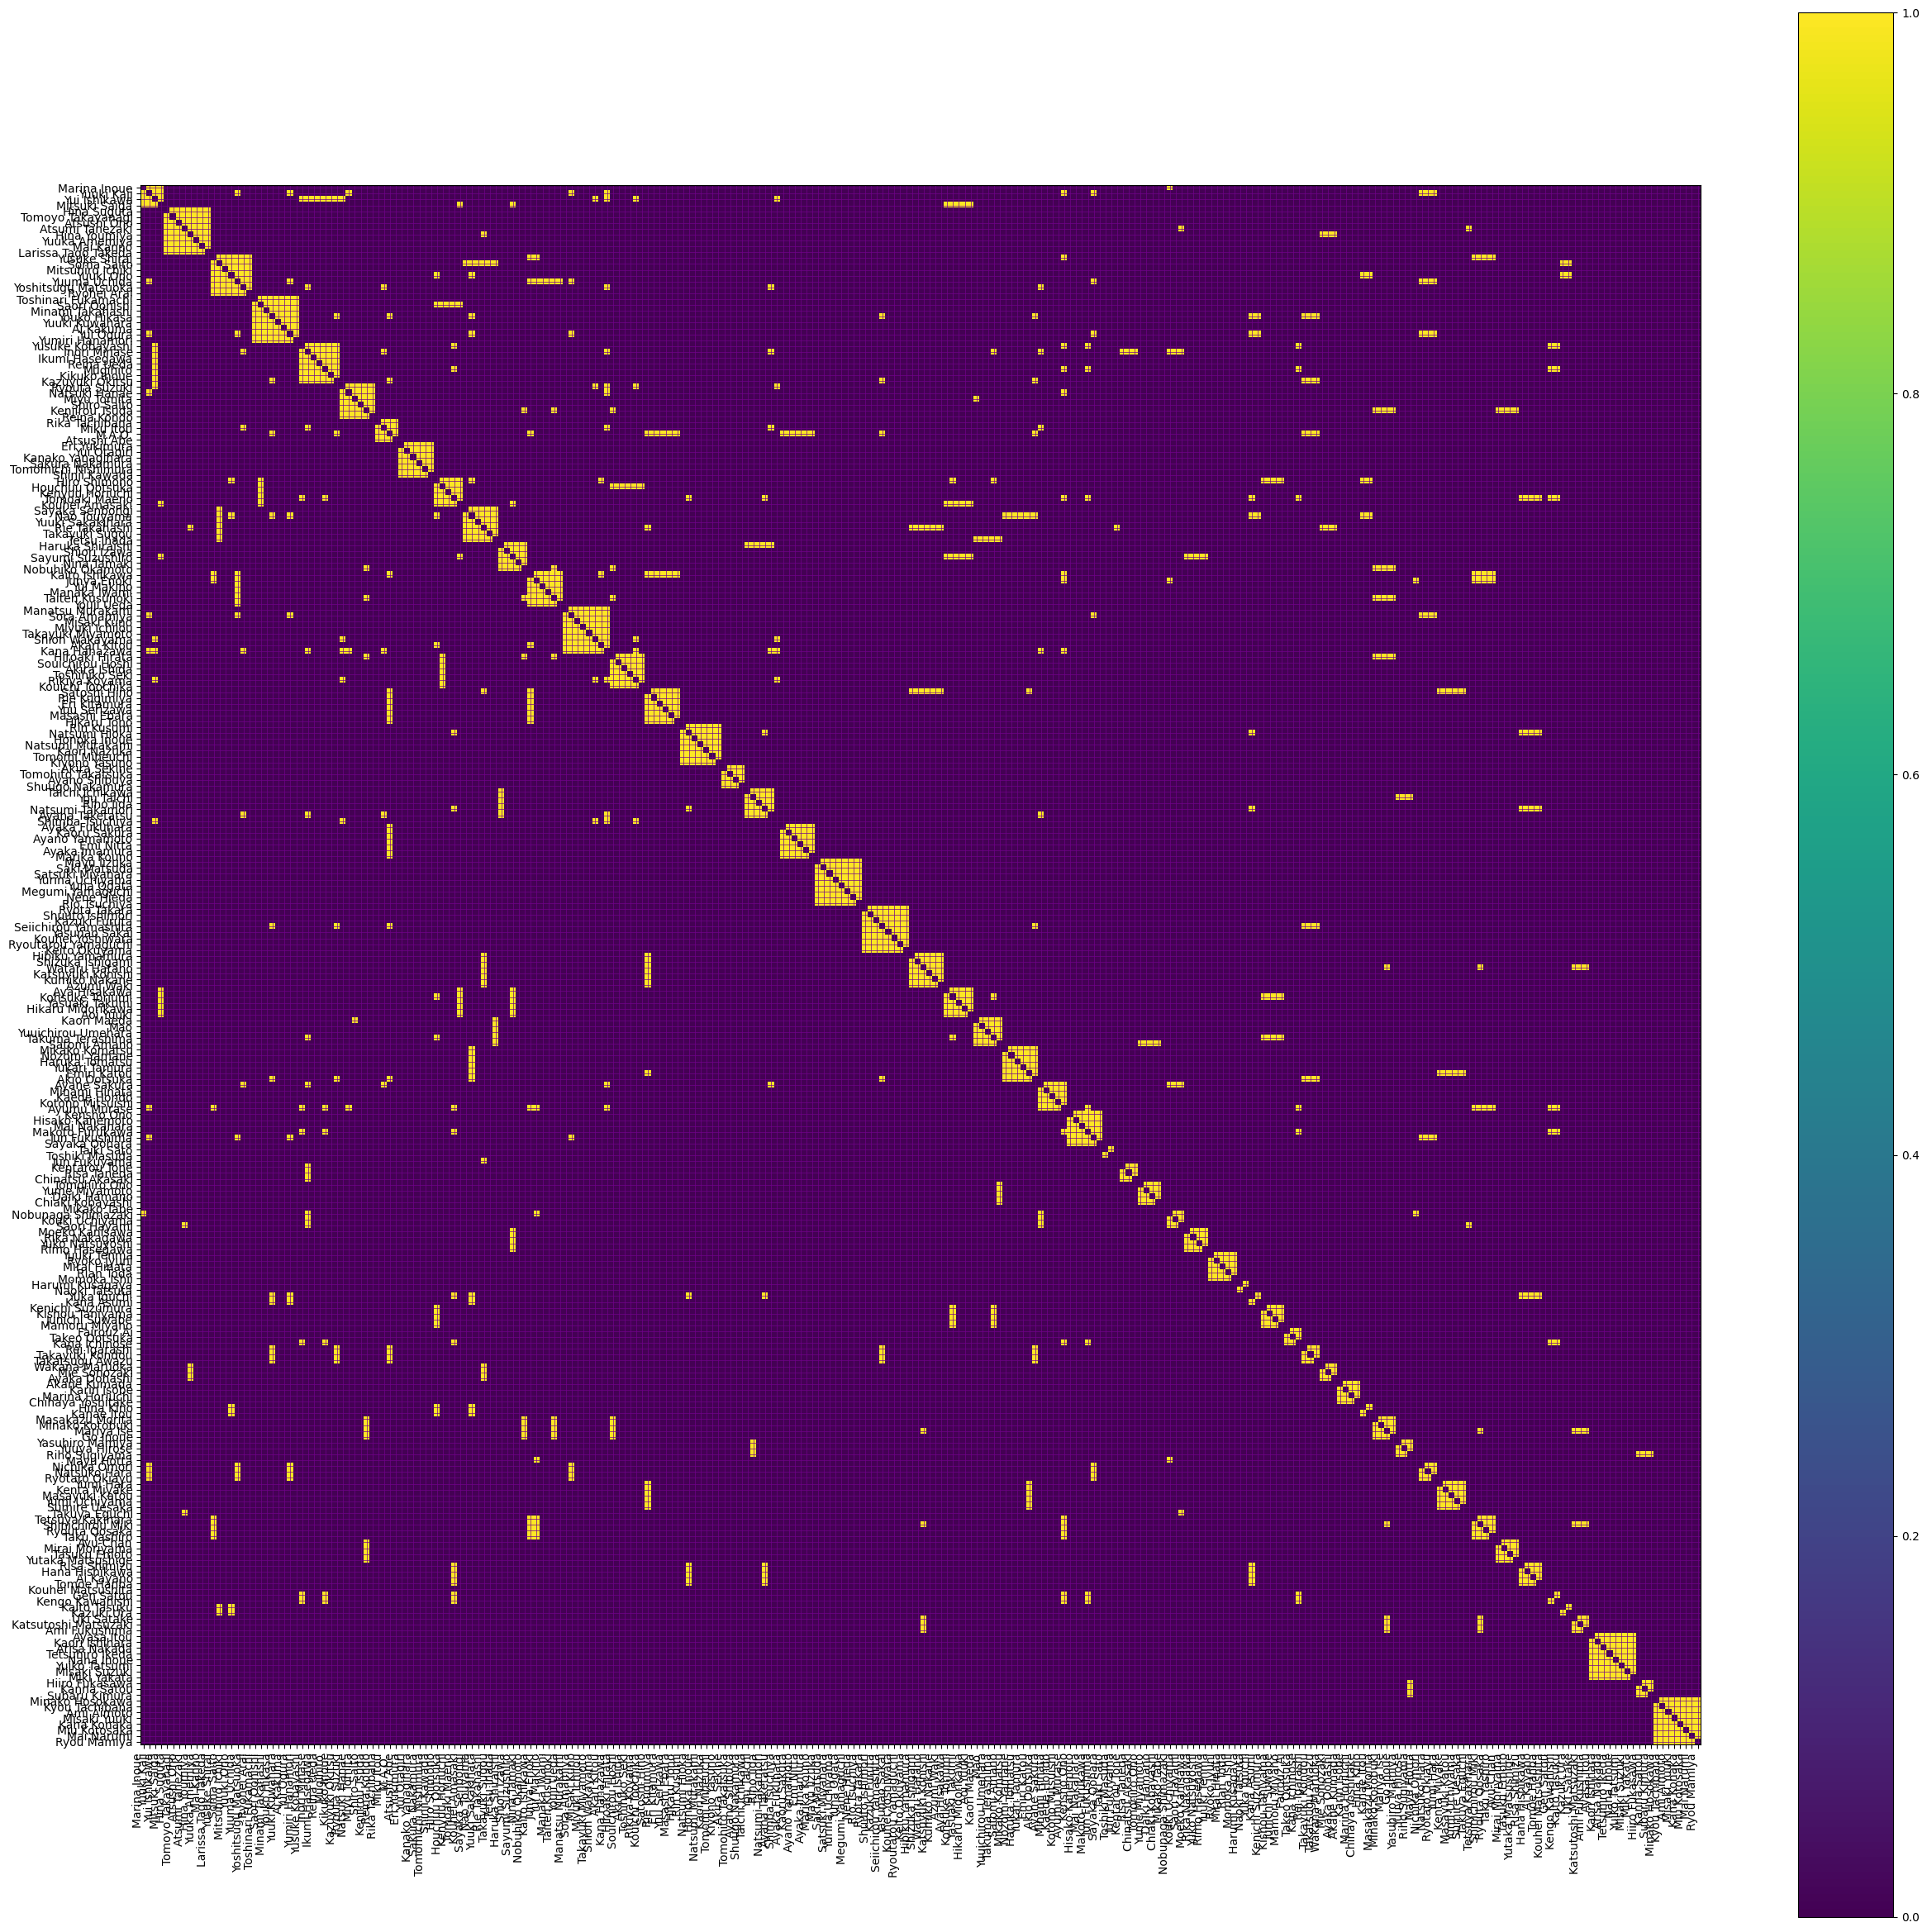

In [ ]:
# ● Matriz de adjacência.

# Obtém a lista de nodes do grafo
nodes = got_net.nodes

# Cria um dicionário para mapear nomes de atores em um index relacionado ao node
node_indices = {node["id"]: index for index, node in enumerate(nodes)}

# Cria uma matriz de adjacência preenchida com zeros
adj_matrix = np.zeros((len(nodes), len(nodes)))

# Obtém as edges do grafo
edges = got_net.edges

# Preenche a matriz de adjacência com as conexões existentes
for edge in edges:
    source = edge["from"]
    target = edge["to"]

    # Obtém os index dos nodes na lista de nós usando o mapeamento de nomes para índices
    source_index = node_indices[source]
    target_index = node_indices[target]

    # Define o valor 1 na matriz de adjacência para indicar a conexão entre os nós
    adj_matrix[source_index][target_index] = 1
    adj_matrix[target_index][source_index] = 1

# Obtém a lista de nomes dos atores
actor_names = [node['id'] for node in got_net.nodes]

# Configura o tamanho da figura
fig, ax = plt.subplots(figsize=(25, 25))

# Exibe a matriz de adjacência como um gráfico de imagem (heatmap)
im = ax.imshow(adj_matrix, interpolation="nearest")

# Ajusta o espaçamento entre os rótulos dos atores no eixo x
ax.set_xticks(range(len(actor_names)))
ax.set_xticklabels(actor_names, rotation='vertical', ha='right')

# Ajusta o espaçamento vertical entre os subplots
fig.subplots_adjust(bottom=0.3, top=0.9)

# Define os rótulos dos atores no eixo y
ax.set_yticks(range(len(actor_names)))
ax.set_yticklabels(actor_names)

ax.grid(color='#71028b', linestyle='-', linewidth=0.5)

plt.colorbar(im)

plt.tight_layout()
plt.show()


In [ ]:
# ● Diâmetro e periferia da rede.

# Verificar se o grafo é conectado
if not nx.is_connected(graph):
    # Obter os componentes conectados
    components = list(nx.connected_components(graph))

    # Calcular o diâmetro e a periferia para cada componente
    for component in components:
        component_graph = graph.subgraph(component)
        diameter = nx.diameter(component_graph)
        periphery = nx.periphery(component_graph)
        print("Diâmetro do componente:", diameter)
        print("Periferia do componente:", periphery)
else:
    # O grafo é conectado, calcular o diâmetro e a periferia diretamente
    diameter = nx.diameter(graph)
    periphery = nx.periphery(graph)
    print("Diâmetro da rede:", diameter)
    print("Periferia da rede:", periphery)

Diâmetro do componente: 7
Periferia do componente: ['Hina Suguta', 'Tomoyo Takayanagi', 'Atsushi Ono', 'Hina Youmiya', 'Yuuka Amemiya', 'Mai Kanno', 'Larissa Tago Takeda', 'Ryota Takara', 'Shuuto Ishimori', 'Kazuki Furuta', 'Yasunao Sakai', 'Kouhei Yoshiwara', 'Ryoutarou Yamaguchi', 'Keito Okuyama', 'Hibiku Yamamura', 'Shizuka Ishigami', 'Katsuyuki Konishi', 'Kumiko Nakane', 'Azumi Waki', 'Jun Fukuyama', 'Tomohiro Ono', 'Yume Miyamoto', 'Daiki Hamano', 'Chiaki Kobayashi', 'Moeko Kanisawa', 'Rika Nakagawa', 'Yuko Natsuyoshi', 'Rimo Hasegawa', 'Wakana Maruoka', 'Mie Sonozaki', 'Ayaka Oohashi', 'Yumi Hara', 'Kenta Miyake', 'Masayuki Katou', 'Yumi Uchiyama', 'Sumire Uesaka', 'Hiiro Fukasawa', 'Kanna Satou', 'Subaru Kimura']
Diâmetro do componente: 1
Periferia do componente: ['Sakura Nakamura', 'Shinji Kawada', 'Tomomichi Nishimura', 'Eri Yukimura', 'Kanako Yanagihara', 'Yui Otagiri']
Diâmetro do componente: 1
Periferia do componente: ['Tomohito Takatsuka', 'Ayano Shibuya', 'Shuugo Nakamura

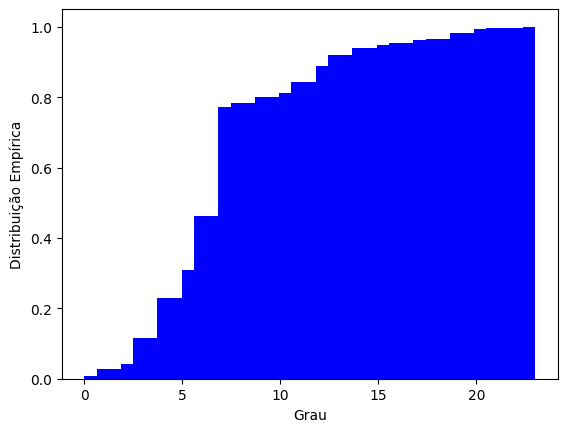

In [ ]:
# ● Histograma de distribuição empírica de grau.

# Obter a lista de graus dos nós
degrees = [degree for node, degree in graph.degree()]

# Criar o histograma
plt.hist(degrees, bins='auto', density=True, cumulative=True, histtype='bar', color='blue')

# Configurar os rótulos dos eixos
plt.xlabel('Grau')
plt.ylabel('Distribuição Empírica')

# Exibir o histograma
plt.show()


In [ ]:
# ● Coeﬁciente de clustering local para nós escolhidos.

# Calcular o coeficiente de clustering local para nós escolhidos
selected_nodes = ['Mayu Iizuka', 'Tomoyo Takayanagi']

# Calcular o coeficiente de clustering local para cada nó escolhido
for node in selected_nodes:
    clustering_coefficient = nx.clustering(graph, node)
    print(f"Coeficiente de clustering local para o nó {node}: {clustering_coefficient}")

# Calcular o coeficiente médio de clustering para todo o grafo
average_clustering_coefficient = nx.average_clustering(graph)
print(f"Coeficiente médio de clustering para o grafo: {average_clustering_coefficient}")


Coeficiente de clustering local para o nó Mayu Iizuka: 1.0
Coeficiente de clustering local para o nó Tomoyo Takayanagi: 1.0
Coeficiente médio de clustering para o grafo: 0.8305510170307192


In [ ]:
# ● Coeﬁciente de clustering global.

# Calcular o coeficiente de clustering global
clustering_coefficient = nx.average_clustering(graph)

print(f"Coeficiente de clustering global: {clustering_coefficient}")

Coeficiente de clustering global: 0.8305510170307192


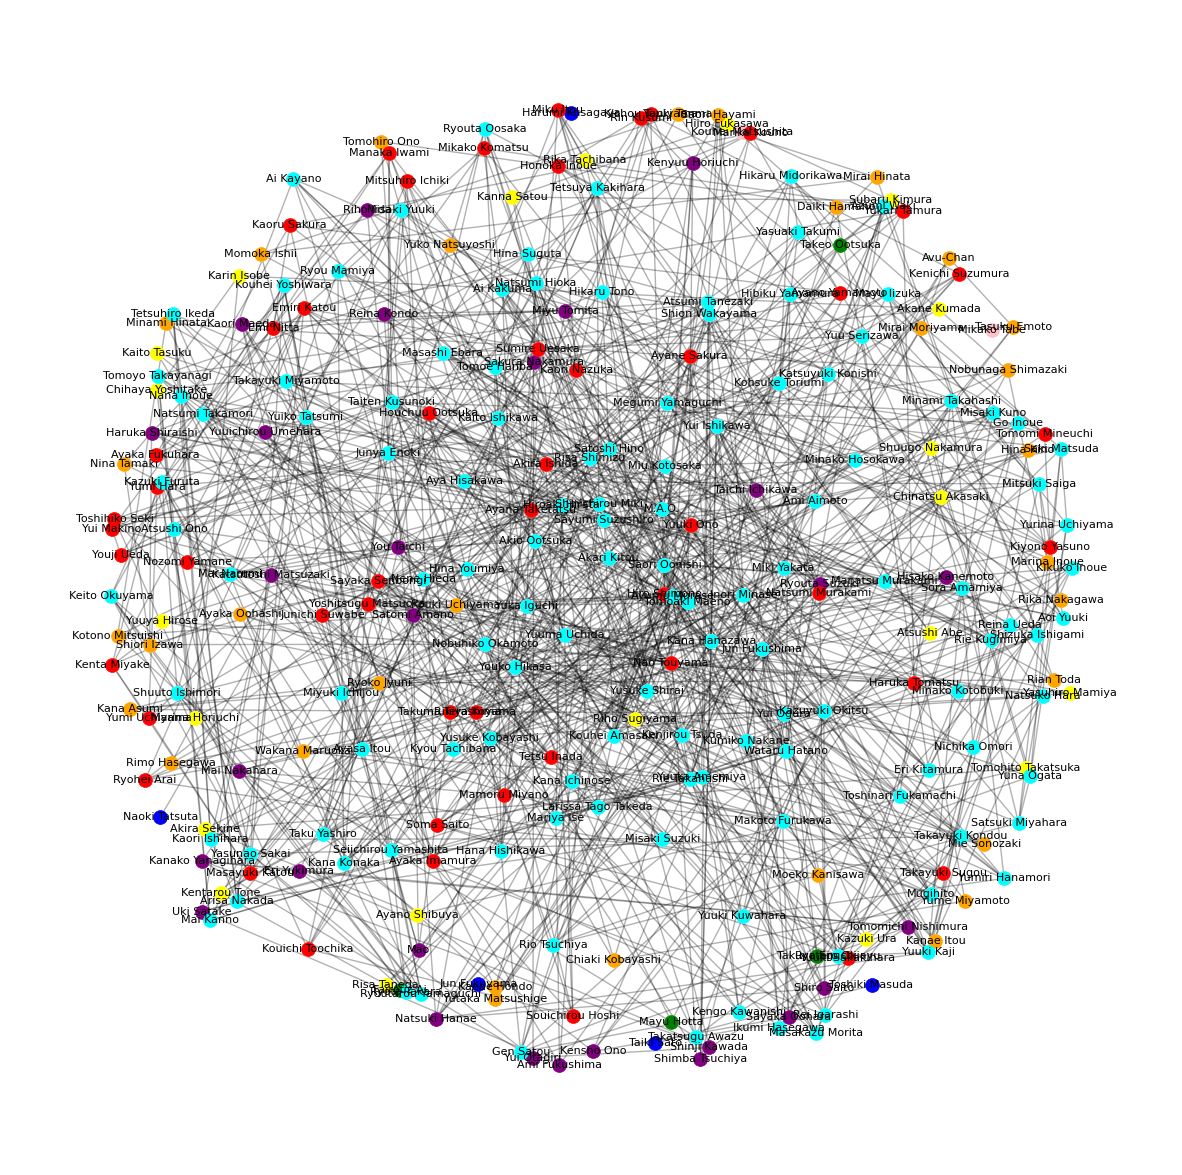

In [90]:
# ● Componentes Conectados Fortemente
# ● Componentes Conectados Fracamente.

# Nessa caso utilizei a abodagem do K-core decomposition para mostrar pelas cores os componentes fortemente e racamente conectados

# Definir os atributos dos nós e arestas
node_options = {
    "node_size": 100,
    "linewidths": 0.5,
}

# Definir as opções dos rótulos dos nós
label_options = {
    "font_size": 8,
}

# Definir a opacidade das arestas
edge_options = {
    "alpha": 0.3,
    "width": 1,
}

pos = nx.fruchterman_reingold_layout(graph, k=1)

# Criar a figura do Matplotlib
fig, ax = plt.subplots(figsize=(15, 15))

# Desenhar o grafo original
nx.draw_networkx_nodes(graph, pos=pos, ax=ax, node_color="white", **node_options)
nx.draw_networkx_edges(graph, pos=pos, ax=ax, **edge_options)
nx.draw_networkx_labels(graph, pos=pos, ax=ax, **label_options)

# Criar os subgrafos para cada shell k
shell_colors = ['Pink', 'Blue', 'Green', 'Yellow', 'Orange', 'Purple', 'Red', 'Cyan']
max_shell = len(shell_colors)

for k in range(0, max_shell):
    # subgraph = consiste em todos os nós do grafo que possuem grau maior ou igual a k.
    subgraph = graph.subgraph(list(nx.k_shell(graph, k)))
    node_color = shell_colors[k] if k <= len(shell_colors) else 'gray'
    nx.draw_networkx_nodes(subgraph, pos=pos, ax=ax, node_color=node_color, **node_options)

# Desenhar os rótulos dos nós
node_labels = nx.get_node_attributes(graph, 'label')
for node, label in node_labels.items():
    ax.text(pos[node][0], pos[node][1], label, horizontalalignment='center', verticalalignment='center', **label_options)



# Exibir o resultado
plt.axis('off')
plt.show()


In [ ]:
# ● Eigenvector centrality.
# Quanto maior o valor da centralidade de eigenvector (eigenvector centrality), maior é a importância do nó dentro da rede.

# Calcular a centralidade de Eigenvector
eigenvector_centrality = nx.eigenvector_centrality(graph)

# Ordenar os nós com base na centralidade de Eigenvector em ordem crescente
sorted_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get)

# Imprimir a centralidade de Eigenvector de cada nó em ordem crescente
for node in sorted_nodes:
    centrality = eigenvector_centrality[node]
    print(f"Node: {node}, Eigenvector Centrality: {centrality}")

Node: Masaaki Waguri, Eigenvector Centrality: 0.005890782184619071
Node: Toshiyuki Nishida, Eigenvector Centrality: 0.006496967736204046
Node: Michio Hazama, Eigenvector Centrality: 0.006496967736204046
Node: Terumi Niki, Eigenvector Centrality: 0.006496967736204046
Node: Masako Sugaya, Eigenvector Centrality: 0.008155431170163766
Node: Yousuke Kondou, Eigenvector Centrality: 0.008155431170163766
Node: Yoshiko Matsuo, Eigenvector Centrality: 0.008155431170163766
Node: Reiko Mutou, Eigenvector Centrality: 0.008155431170163766
Node: Emi Tanaka, Eigenvector Centrality: 0.00884201668907448
Node: Ryuusei Nakao, Eigenvector Centrality: 0.00884201668907448
Node: Yoshiko Yamamoto, Eigenvector Centrality: 0.00884201668907448
Node: Takeshi Watabe, Eigenvector Centrality: 0.00884201668907448
Node: Takashi Taguchi, Eigenvector Centrality: 0.00884201668907448
Node: Michihiro Ikemizu, Eigenvector Centrality: 0.00884201668907448
Node: Rei Sakuma, Eigenvector Centrality: 0.012557610551452712
Node: May

In [ ]:
# ● Degree centrality.
# Quanto maior o valor da centralidade de grau (degree centrality), mais conexões (arestas) um nó possui em relação aos demais nós do grafo

# Calcular a centralidade de grau
degree_centrality = nx.degree_centrality(graph)

# Ordenar os nós com base na centralidade de grau em ordem crescente
sorted_nodes = sorted(degree_centrality, key=degree_centrality.get)

# Imprimir a centralidade de grau de cada nó em ordem crescente
for node in sorted_nodes:
    centrality = degree_centrality[node]
    print(f"Node: {node}, Degree Centrality: {centrality}")

Node: Masaaki Waguri, Degree Centrality: 0.007246376811594203
Node: Masaki Maeda, Degree Centrality: 0.014492753623188406
Node: Kazuyo Aoki, Degree Centrality: 0.014492753623188406
Node: Toshiyuki Nishida, Degree Centrality: 0.021739130434782608
Node: Michio Hazama, Degree Centrality: 0.021739130434782608
Node: Terumi Niki, Degree Centrality: 0.021739130434782608
Node: Yoshio Kaneuchi, Degree Centrality: 0.021739130434782608
Node: Rei Sakuma, Degree Centrality: 0.021739130434782608
Node: Mayumi Shou, Degree Centrality: 0.021739130434782608
Node: Nobuyo Oyama, Degree Centrality: 0.028985507246376812
Node: Kazuya Tatekabe, Degree Centrality: 0.028985507246376812
Node: Masako Sugaya, Degree Centrality: 0.028985507246376812
Node: Yousuke Kondou, Degree Centrality: 0.028985507246376812
Node: Yoshiko Matsuo, Degree Centrality: 0.028985507246376812
Node: Reiko Mutou, Degree Centrality: 0.028985507246376812
Node: Fusako Amachi, Degree Centrality: 0.036231884057971016
Node: Junichi Inoue, Degre

In [94]:
# ● Closeness centrality.
# Quanto maior o valor da closeness centrality de um nó em um grafo, significa que esse nó está mais próximo dos outros nós do grafo em termos de distância geodésica.

# Calcular a closeness centrality
closeness_centrality = nx.closeness_centrality(graph)

# Ordenar os nós com base na closeness centrality em ordem crescente
sorted_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1])

# Imprimir a closeness centrality de cada nó em ordem crescente
for node, centrality in sorted_centrality:
    print(f"Node: {node}, Closeness Centrality: {centrality}")

Node: Mikako Tabe, Closeness Centrality: 0.0
Node: Kouhei Matsushita, Closeness Centrality: 0.0
Node: Taiki Sato, Closeness Centrality: 0.0037735849056603774
Node: Toshiki Masuda, Closeness Centrality: 0.0037735849056603774
Node: Harumi Kusagaya, Closeness Centrality: 0.0037735849056603774
Node: Naoki Tatsuta, Closeness Centrality: 0.0037735849056603774
Node: Akira Sekine, Closeness Centrality: 0.011320754716981131
Node: Tomohito Takatsuka, Closeness Centrality: 0.011320754716981131
Node: Ayano Shibuya, Closeness Centrality: 0.011320754716981131
Node: Shuugo Nakamura, Closeness Centrality: 0.011320754716981131
Node: Akane Kumada, Closeness Centrality: 0.011320754716981131
Node: Karin Isobe, Closeness Centrality: 0.011320754716981131
Node: Marina Horiuchi, Closeness Centrality: 0.011320754716981131
Node: Chihaya Yoshitake, Closeness Centrality: 0.011320754716981131
Node: Yuuki Tenma, Closeness Centrality: 0.01509433962264151
Node: Ryoko Jyuni, Closeness Centrality: 0.01509433962264151
N

In [93]:
# ● Betweenness centrality.
# Quanto maior o betweenness centrality de um nó, significa que esse nó tem uma maior influência na comunicação e fluxo de informações dentro de um grafo.

# Calcular a betweenness centrality
betweenness_centrality = nx.betweenness_centrality(graph)

# Classificar os nós com base na betweenness centrality em ordem crescente
sorted_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get)

# Imprimir a betweenness centrality de cada nó em ordem crescente
for node in sorted_nodes:
    centrality = betweenness_centrality[node]
    print(f"Node: {node}, Betweenness Centrality: {centrality}")


Node: Hina Suguta, Betweenness Centrality: 0.0
Node: Tomoyo Takayanagi, Betweenness Centrality: 0.0
Node: Atsushi Ono, Betweenness Centrality: 0.0
Node: Yuuka Amemiya, Betweenness Centrality: 0.0
Node: Mai Kanno, Betweenness Centrality: 0.0
Node: Larissa Tago Takeda, Betweenness Centrality: 0.0
Node: Mitsuhiro Ichiki, Betweenness Centrality: 0.0
Node: Ryohei Arai, Betweenness Centrality: 0.0
Node: Toshinari Fukamachi, Betweenness Centrality: 0.0
Node: Minami Takahashi, Betweenness Centrality: 0.0
Node: Yuuki Kuwahara, Betweenness Centrality: 0.0
Node: Ai Kakuma, Betweenness Centrality: 0.0
Node: Yumiri Hanamori, Betweenness Centrality: 0.0
Node: Ikumi Hasegawa, Betweenness Centrality: 0.0
Node: Reina Ueda, Betweenness Centrality: 0.0
Node: Kikuko Inoue, Betweenness Centrality: 0.0
Node: Shiro Saito, Betweenness Centrality: 0.0
Node: Reina Kondo, Betweenness Centrality: 0.0
Node: Rika Tachibana, Betweenness Centrality: 0.0
Node: Atsushi Abe, Betweenness Centrality: 0.0
Node: Eri Yukimur

In [92]:
# ● Assortatividade geral da rede.

# Se a assortatividade > 0: significa que há uma tendência para nós com graus semelhantes se conectarem entre si.
# Se a assortatividade < 0: significa que há uma tendência para nós com graus diferentes se conectarem entre si.
# Se a assortatividade = 0: significa que não há uma tendência clara para nós com graus semelhantes ou diferentes se conectarem entre si.

assortativity = nx.degree_assortativity_coefficient(graph)
print("Assortatividade geral da rede:", assortativity)

Assortatividade geral da rede: 0.11254642198066878
